In [3]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from numpy import nan as NA
import pydataset

In [25]:
#randint 는 reshape 불가능 안에다가 넣어줘야댐 행렬 
a=np.random.randint(0,301,(365,4))
a

array([[171, 163, 253, 122],
       [ 94,  13, 241, 141],
       [198, 218,  40, 274],
       ...,
       [ 49, 299, 272, 256],
       [295, 268, 116, 162],
       [ 14,  44, 158, 267]])

In [34]:
#1년치 매출 1/1-12/31, 월별 평균 
year_sell=pd.DataFrame(a, index=pd.date_range('2022-01-01','2022-12-31'),
                 columns=['육류', '채소류', '유제품류', '스낵류'])
year_sell.resample('M',kind='period').mean()

,육류,채소류,유제품류,스낵류
2022-01,172.161290,153.161290,166.645161,181.548387
2022-02,133.642857,142.535714,154.071429,159.071429
2022-03,152.290323,173.096774,134.419355,132.322581
2022-04,143.166667,179.033333,157.933333,150.833333
2022-05,155.677419,122.709677,138.548387,127.096774
2022-06,154.000000,140.766667,156.000000,150.133333
2022-07,142.161290,135.903226,125.935484,160.580645
2022-08,148.483871,149.903226,168.387097,169.870968
2022-09,156.300000,140.200000,160.766667,136.800000
2022-10,155.322581,134.096774,122.612903,156.774194


In [60]:
#2022/1/1 부터 30일간격으로 12개 가진 데이터 
dates=pd.date_range('2022-01-01', periods=12, freq='30D')
dates
ts=pd.Series(np.random.randint(1,10,size=12),index=dates)
ts
#1-6월까지 평균
ts.iloc[:7].mean()
ts['2022-01': '2022-06'].mean()

5.714285714285714

In [90]:
#audi와 ford만 ! 
mpg=pydataset.data('mpg')
mpg[mpg['manufacturer'].isin(['audi','ford'])]
mpg[(mpg['manufacturer']=='audi')|(mpg['manufacturer']=='ford')]
mpg.query('  manufacturer=="audi"   ')

#query 검색하다 ('문자열') 구분하기위해서 audi ford 큰따옴표 or | 모두 가능 
mpg.query('  manufacturer=="audi" or manufacturer =="ford"  ')

#cyl ==4또는 6, 18<=cty<=22
mpg.query('  cyl==4 or cyl== 6 and  cty >= 18 and cty <= 22 ').head()
#쿼리 속 쿼리도 가능 
mpg.query(' cyl == 4 | cyl == 6 ').query(' cty >= 18 & cty <= 22')


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
6,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


### Query 개쩐다 .  

# 고급 PANDAS

In [98]:
values= pd.Series(['apple','orange','apple','orange']*2)

#위아래 같음 
values = pd.Series([0,1,0,0]*2)
dim= pd.Series(['apple','orange'])
dim.take(values)
#take 숫자를 인덱스로 받아들임 

0     apple
1    orange
0     apple
0     apple
0     apple
1    orange
0     apple
0     apple
dtype: object

In [107]:
fruits=['apple','orange','apple','orange']*2
N=len(fruits)
df = pd.DataFrame({'fruit': fruits,
                   'basket_id': np.arange(N),
                   'count': np.random.randint(3, 15, size=N),
                   'weight': np.random.uniform(0, 4, size=N)},
                   columns=['basket_id', 'fruit', 'count', 'weight']) 
df

,basket_id,fruit,count,weight
0,0,apple,7,2.787299
1,1,orange,12,3.288998
2,2,apple,10,3.292248
3,3,orange,5,0.409134
4,4,apple,4,3.475333
5,5,orange,8,3.102331
6,6,apple,8,3.159653
7,7,orange,11,3.379206


In [140]:
#fruit 범주형으로 바꾸기
fruit_cat=df['fruit'].astype('category')
c=fruit_cat.values
c.categories
c.codes
li=list(df['fruit'])
my_cat1=pd.Categorical(li)
my_cat1

['apple', 'orange', 'apple', 'orange', 'apple', 'orange', 'apple', 'orange']
Categories (2, object): ['apple', 'orange']

In [162]:
#데이터 타입 바꾸기 
df['count'].astype('str')
df['count'].map(str)
df['count'].to_string
df

,basket_id,fruit,count,weight
0,0,apple,7,2.787299
1,1,orange,12,3.288998
2,2,apple,10,3.292248
3,3,orange,5,0.409134
4,4,apple,4,3.475333
5,5,orange,8,3.102331
6,6,apple,8,3.159653
7,7,orange,11,3.379206


In [141]:
#범주형 데이터 직접 생성
categories=['foo','bar','baz']
codes=[0,1,2,0,0,1]
my_cat=pd.Categorical.from_codes(codes,categories,ordered=True)
my_cat

['foo', 'bar', 'baz', 'foo', 'foo', 'bar']
Categories (3, object): ['foo' < 'bar' < 'baz']

### Categorical 연산

In [167]:
np.random.seed(12345)
num=np.random.randn(1000)
num[:5]
bins=pd.cut(num, bins=4, labels=['Q1','Q2','Q3','Q4'])
bins.codes[:50]
#각각의 데이터들에게 맞는 값을 주고싶을때 transform 
pd.Series(num).groupby(bins).transform('mean')

0     -0.322720
1     -0.322720
2     -0.322720
3     -0.322720
4      1.066326
         ...   
995   -0.322720
996   -0.322720
997   -0.322720
998    1.066326
999    1.066326
Length: 1000, dtype: float64

In [158]:
#groupby로 요약 통계 여러개는 . agg 만 가능 
list(pd.Series(num).groupby(bins))
pd.Series(num).groupby(bins).mean()
pd.Series(num).groupby(bins).apply('mean')
pd.Series(num).groupby(bins).agg('mean')
pd.Series(num).groupby(bins).transform('mean')

pd.Series(num).groupby(bins).agg([('평균','mean'),('합','sum')])

,평균,합
Q1,-1.672160,-158.855218
Q2,-0.322720,-192.018526
Q3,1.066326,318.831556
Q4,2.699225,29.691477


In [164]:
c.categories

Index(['apple', 'orange'], dtype='object')

In [166]:
c.codes

array([0, 1, 0, 1, 0, 1, 0, 1], dtype=int8)

## 2012 연방선거관리위원회

In [4]:
fec=pd.read_csv('https://raw.githubusercontent.com/wesm/pydata-book/3rd-edition/datasets/fec/P00000001-ALL.csv')
fec.head()

C:\Users\user\AppData\Local\Temp\ipykernel_21092\3284363396.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  fec=pd.read_csv('https://raw.githubusercontent.com/wesm/pydata-book/3rd-edition/datasets/fec/P00000001-ALL.csv')


,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403.0,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253.0,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467.0,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [6]:
fec[fec['contb_receipt_amt'] < 0].count() 

cmte_id              9647
cand_id              9647
cand_nm              9647
contbr_nm            9647
contbr_city          9646
contbr_st            9647
contbr_zip           9638
contbr_employer      3560
contbr_occupation    3560
contb_receipt_amt    9647
contb_receipt_dt     9647
receipt_desc         8947
memo_cd              3006
memo_text            3471
form_tp              9647
file_num             9647
dtype: int64

In [8]:
(fec.contb_receipt_amt<0).count() 

1001731

In [174]:
values= pd.Series(['apple','orange','apple','orange']*2)

In [183]:
cat_s=values.astype('category')

In [185]:
c=cat_s.values
c.codes


array([0, 1, 0, 1, 0, 1, 0, 1], dtype=int8)

In [188]:
cat_s.cat.codes
cat_s.cat.categories


Index(['apple', 'orange'], dtype='object')

# 영화평점데이터🕹️

In [203]:
pd.options.display.max_rows = 10
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('users.dat', sep='::', header=None, names=unames,encoding_errors='ignore')
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ratings.dat', sep='::',header=None, names=rnames,encoding_errors='ignore')
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('movies.dat', sep='::',header=None, names=mnames,encoding_errors='ignore') 
users
ratings


C:\Users\user\AppData\Local\Temp\ipykernel_25468\1238892778.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  users = pd.read_table('users.dat', sep='::', header=None, names=unames,encoding_errors='ignore')
C:\Users\user\AppData\Local\Temp\ipykernel_25468\1238892778.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings = pd.read_table('ratings.dat', sep='::',header=None, names=rnames,encoding_errors='ignore')
C:\Users\user\AppData\Local\Temp\ipykernel_25468\1238892778.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [230]:
#세개합치기
data=users.merge(ratings).merge(movies)
data[:1]

,user_id,gender,age,occupation,zip,movie_id,rating,timestamp,title,genres
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama


In [231]:
#3개 다 merge
data=pd.merge(pd.merge(ratings,users),movies)
data[:1]

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama


In [295]:
#성별로 나눠 제목별 평점 
mean_ratings=data.pivot_table('rating',index='title', columns='gender')
mean_ratings
#female에게 높은 평점 받은 상위 10개 
temp=mean_ratings.sort_values(by='F', ascending=False)[:10]
#제목만 보기 
list(mean_ratings.sort_values(by='F', ascending=False)[:10].index)
temp.reset_index()['title']

temp=temp.reset_index()
temp[['title']]


gender,title
0,Clean Slate (Coup de Torchon) (1981)
1,"Ballad of Narayama, The (Narayama Bushiko) (1958)"
2,Raw Deal (1948)
3,Bittersweet Motel (2000)
4,Skipped Parts (2000)
5,Lamerica (1994)
6,"Gambler, The (A Jtkos) (1997)"
7,"Brother, Can You Spare a Dime? (1975)"
8,Ayn Rand: A Sense of Life (1997)
9,24 7: Twenty Four Seven (1997)


In [291]:
#년도 빼고 제목의 문자열만 
temp['title']=temp['title'].str[:-6]
temp 

#for문
for i in temp["title"]:
    print(i[:-7]) 
 #list comprehension   
[(i[:-7]) for i in temp["title"] ]

gender,title,F,M
0,Clean Slate (Coup de Tor,5.0,3.857143
1,"Ballad of Narayama, The (Narayama Bus",5.0,3.428571
2,Raw,5.0,3.307692
3,Bittersweet,5.0,NaN
4,Skipped,5.0,4.000000
5,Lam,5.0,4.666667
6,"Gambler, The (A J",5.0,3.166667
7,"Brother, Can You Spare a",5.0,3.642857
8,Ayn Rand: A Sense of,5.0,4.000000
9,24 7: Twenty Four,5.0,3.750000


In [243]:
#영화별 평점의 개수 , 많을수록 많은 사람들이 평점을 남김
data.groupby('title').size()

title
$1,000,000 Duck (1971)                       37
'Night Mother (1986)                         70
'Til There Was You (1997)                    52
'burbs, The (1989)                          303
...And Justice for All (1979)               199
                                           ... 
Zed & Two Noughts, A (1985)                  29
Zero Effect (1998)                          301
Zero Kelvin (Kjrlighetens kjtere) (1995)      2
Zeus and Roxanne (1997)                      23
eXistenZ (1999)                             410
Length: 3706, dtype: int64

In [341]:
#시리즈 정렬 타이틀 개수로 정렬 
data.groupby(data['title']).size().sort_values()[-10:]

#평점 250 개 이상인 타이틀 , 타이틀이 index
a=data.groupby(['title']).size()
a.index[a>=250]

a=data.groupby(['title']).size()
active_titles=(a[a>=250].index

In [347]:
mean_ratings=mean_ratings.loc[active_titles]
mean_ratings[:3]

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000


## 평점 차이 구하기 남녀간의 호불호 

<Axes: xlabel='title'>

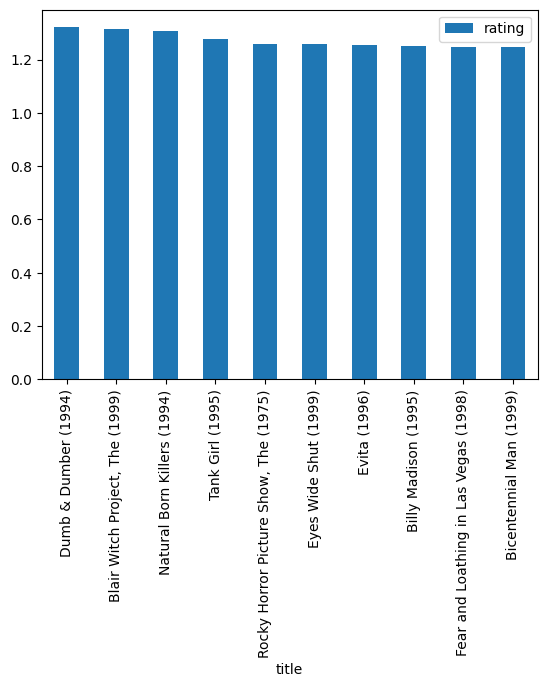

In [388]:
#평점 차이 : 여자의 선호도 순 . 호불호가 큰 값부터
mean_ratings['diff']=mean_ratings['M']-mean_ratings['F']
mean_ratings.sort_values(by='diff')[::-1][:10]
#역순:[::-1][:10] 남성의 선호도 순

#성별 관계없는 호불호 극명하게 나뉘는 영화 , 높은것부터 내림차순 10개
rating_std_by_title=data.groupby('title')['rating'].std()
rating_std_by_title=rating_std_by_title.loc[active_titles]
a=rating_std_by_title.sort_values(ascending=False)[:10]
#그래프 만들기 
df=pd.DataFrame(a).reset_index()
df.plot.bar(x='title',y='rating')

a.plot.bar()

In [398]:
#장르 파이프(|) 기준으로 나누기
all_genres=[]
for i in movies['genres']:
    all_genres.extend(i.split('|'))
genres= pd.unique(all_genres)
genres

array(['Animation', "Children's", 'Comedy', 'Adventure', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir',
       'Western'], dtype=object)

In [391]:
movies

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [401]:
pd.options.display.max_rows = 10
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('users.dat', sep='::', header=None, names=unames,encoding_errors='ignore')
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ratings.dat', sep='::',header=None, names=rnames,encoding_errors='ignore')
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('movies.dat', sep='::',header=None, names=mnames,encoding_errors='ignore') 
users
ratings
movies

C:\Users\user\AppData\Local\Temp\ipykernel_25468\4013556700.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  users = pd.read_table('users.dat', sep='::', header=None, names=unames,encoding_errors='ignore')
C:\Users\user\AppData\Local\Temp\ipykernel_25468\4013556700.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings = pd.read_table('ratings.dat', sep='::',header=None, names=rnames,encoding_errors='ignore')
C:\Users\user\AppData\Local\Temp\ipykernel_25468\4013556700.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [400]:
#movies. genres 파이프 기준 나누기
# 장르별 빈도수 세기
# 어느장르가 제일 많은지 

array(['Animation', "Children's", 'Comedy', 'Adventure', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir',
       'Western'], dtype=object)

In [440]:
all_genres=[]
for i in movies['genres']:
    all_genres.append(i.split('|'))
all_genres[:3]



[['Animation', "Children's", 'Comedy'],
 ['Adventure', "Children's", 'Fantasy'],
 ['Comedy', 'Romance']]

In [450]:
movies['all_genres']=all_genres
movies

,movie_id,title,genres,all_genres
0,1,Toy Story (1995),Animation|Children's|Comedy,"[Animation, Children's, Comedy]"
1,2,Jumanji (1995),Adventure|Children's|Fantasy,"[Adventure, Children's, Fantasy]"
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),Comedy|Drama,"[Comedy, Drama]"
4,5,Father of the Bride Part II (1995),Comedy,[Comedy]
...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,[Comedy]
3879,3949,Requiem for a Dream (2000),Drama,[Drama]
3880,3950,Tigerland (2000),Drama,[Drama]
3881,3951,Two Family House (2000),Drama,[Drama]


In [422]:
all_genres=[]
for i in movies['genres']:
    all_genres.extend(i.split('|'))
genres=pd.unique(all_genres)
genres

array(['Animation', "Children's", 'Comedy', 'Adventure', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir',
       'Western'], dtype=object)

In [425]:
df=pd.DataFrame((len(movies),len(genres)))
df

,0
0,3883
1,18


In [432]:

gen=movies.genres.columns
gen.split('|')



AttributeError: 'Series' object has no attribute 'columns'

In [458]:
users[users['gender']=='F']

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
5,6,F,50,9,55117
9,10,F,35,1,95370
10,11,F,25,1,04093
15,16,F,35,0,20670
...,...,...,...,...,...
6034,6035,F,25,1,78734
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706


In [460]:
#top 함수를 user 나이를 기준으로 상위 5개 반환하게 정의
def top(x):
    return x.sort_values('age').head()

users.groupby('gender').apply(top)

user_id gender  age  occupation    zip
gender                                             
F      0           1      F    1          10  48067
       2154     2155      F    1          10  50246
       2136     2137      F    1          10  00681
       2132     2133      F    1          10  01607
       2044     2045      F    1           0  24179
M      3572     3573      M    1          10  48867
       925       926      M    1          10  07869
       5242     5243      M    1          10  54220
       1083     1084      M    1          19  03226
       4005     4006      M    1           7  48038

In [475]:
# age가 1이거나 2인 user 뽑기 
users[users['age'].isin([1,2])]
#그 상태에서 성별로 groupby
dict(list(users[users['age'].isin([1,2])].groupby('gender')))


,0,1
0,F,user_id gender age occupation zip 0 1 F 1 10 48...
1,M,user_id gender age occupation zip 18 19 M 1 10 48...


In [464]:
users.groupby('gender')